In [4]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

#!pip install -q transformers

from transformers import pipeline

c:\Users\steph\anaconda3\envs\main\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
Fs = 22050

In [6]:
x = np.load('values/x.npy')
x_h = np.load('values/x_h.npy')
x_p = np.load('values/x_p.npy')
x_h_onset = np.load('values/x_h_onset.npy')
x_p_onset = np.load('values/x_p_onset.npy')
x_loudness = np.load('values/x_loudness.npy')

In [7]:
sr = Fs

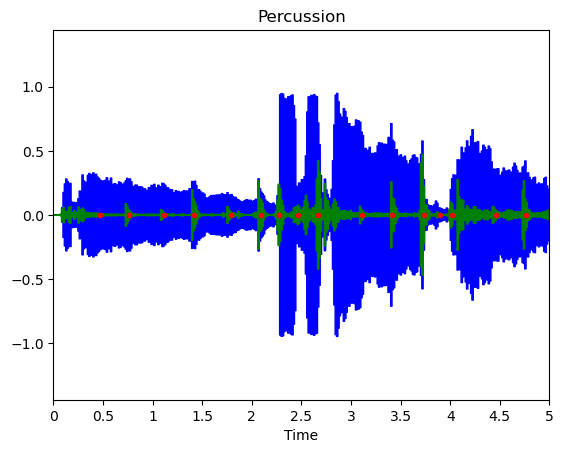

In [8]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
librosa.display.waveshow(x_p, sr=sr, color='green', axis='time')
plt.scatter(x_p_onset[:, 0], np.zeros_like(x_p_onset[:, 0]), color='red', marker='.', label='Note Onsets')
plt.xlim(0, 5)
plt.title('Percussion')
plt.show()

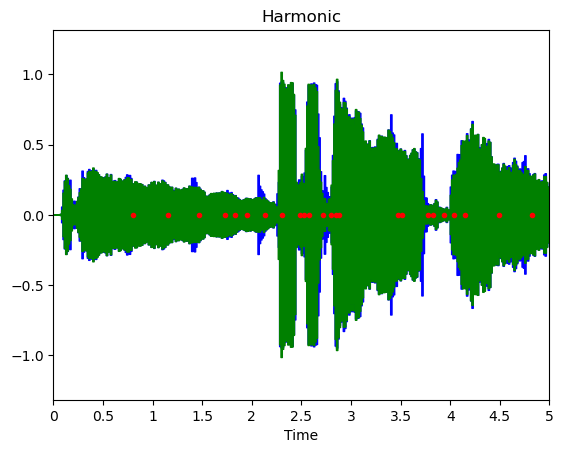

In [9]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
librosa.display.waveshow(x_h, sr=sr, color='green', axis='time')
plt.scatter(x_h_onset[:, 0], np.zeros_like(x_h_onset[:, 0]), color='red', marker='.', label='Note Onsets')
plt.xlim(0, 5)
plt.title('Harmonic')
plt.show()

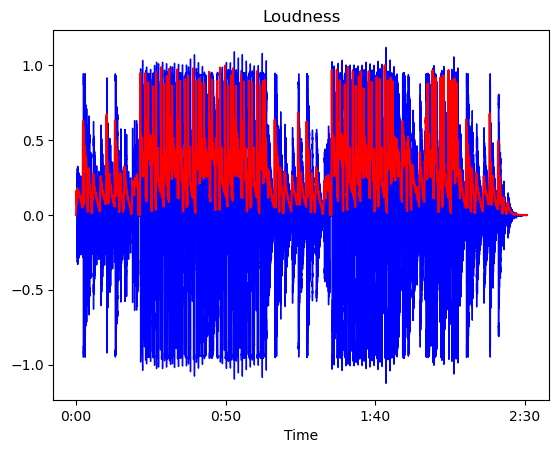

In [10]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
plt.plot(librosa.times_like(x_loudness), x_loudness, color='red')
plt.title('Loudness')
plt.show()

In [11]:
fps = 30
n_frames = int(librosa.samples_to_time(len(x), sr=sr)*fps)

In [12]:
beats_h = np.rint(x_h_onset[:,0]*fps).astype(int).tolist()
beats_p = np.rint(x_p_onset[:,0]*fps).astype(int).tolist()

### Grab colour range from lyrics

In [13]:
# Colour channel ranges - can adjust these
blue_ranges = [(0, 50), (0, 150), (150, 255)]
purple_ranges = [(100, 255), (0, 50), (100, 255)]
red_ranges = [(150, 255), (0, 50), (0, 50)]
orange_ranges = [(200, 255), (50, 150), (0, 50)]
yellow_ranges = [(200, 255), (200, 255), (0, 50)]
green_ranges = [(0, 50), (150, 255), (0, 50)]

In [14]:
lyrics = "First of March, it's clear to me There's something that's uncomforting Your body has a way with me But I'm exactly where I wanna be But I'm a long way from home I know your voice, I know your face This is something I cannot replace Give me hope and give me doubt Well I loved you then but I don't love you now I'm a long way from home 'Cause we're a long way from home No listen now, don't walk away I've got nothing more to say Can you see it in my dying face You're acting like I care Now is there anything that I can do If there was would we be singing 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you"

In [15]:
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier(lyrics, )

max_score = 0
max_label = ""
for i in prediction[0]:
  if i['score'] > max_score:
    max_score = i['score']
    max_label = i['label']

print(max_label, max_score)

# output second most likely emotion
second_max_score = 0
second_max_label = ""
for i in prediction[0]:
  if i['score'] > second_max_score and i['score'] < max_score:
    second_max_score = i['score']
    second_max_label = i['label']

print(second_max_label, second_max_score)


c:\Users\steph\anaconda3\envs\main\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
c:\Users\steph\anaconda3\envs\main\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


sadness 0.9482561945915222
love 0.03348318859934807


Setting presets for the colour range, brightness range and ripple charactersitics based on lyrics

In [16]:
#based on the main emotion and secondary emotion provide the two ranges
# Set baseline colourset, brightness range and ripple characteristics (i.e. how quick or slow)

match max_label:
    case "sadness":
        base_colour_range = blue_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "joy":
        base_colour_range = yellow_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case "anger":
        base_colour_range = red_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "fear":
        base_colour_range = purple_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "love":
        base_colour_range = orange_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case "surprise":
        base_colour_range = green_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case _:
        base_colour_range = yellow_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    
match second_max_label:
    case "sadness": # blue + purple
        secondary_colour_range = blue_ranges
    case "joy":
        secondary_colour_range = yellow_ranges
    case "anger": # red + orange
        secondary_colour_range = red_ranges
    case "fear":
        secondary_colour_range = green_ranges
    case "love": # yellow + green
        secondary_colour_range = orange_ranges
    case "surprise": #orange + yellow
        secondary_colour_range = green_ranges
    case _:
        secondary_colour_range = yellow_ranges

print(base_colour_range, secondary_colour_range, brightness_range, ripple_speed)

[(0, 50), (0, 150), (150, 255)] [(200, 255), (50, 150), (0, 50)] (0.5, 1.0) 0.5


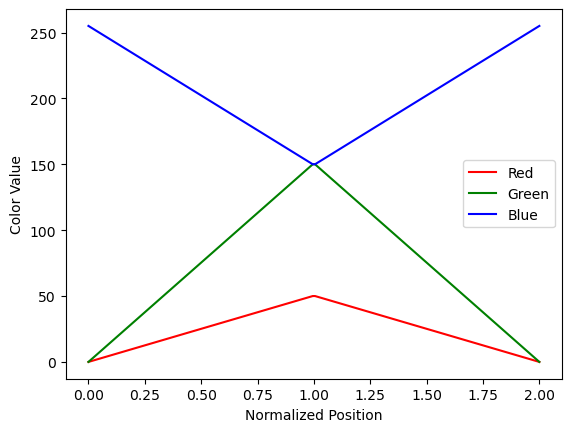

In [33]:
# plot the colour range for base colour from (max, max 0) to (0, 0, max) to (max, max, 0) where it is (r, g, b)
#i.e (50, 150, 0) to (0, 0, 255) to (50, 150, 0) where the min values are (0, 0, 150)

def lerp(start, end, t):
    return (1 - t) * start + t * end

num_points = 100
# max_label = "joy"
if (max_label == "sadness"):
    gradient_segment1 = [(
        lerp(base_colour_range[0][1], base_colour_range[0][0], t),
        lerp(base_colour_range[1][1], base_colour_range[1][0], t),
        lerp(base_colour_range[2][0], base_colour_range[2][1], t)
    ) for t in np.linspace(0, 1, num_points)]

    gradient_segment2 = [(
        lerp(base_colour_range[0][0], base_colour_range[0][1], t),
        lerp(base_colour_range[1][0], base_colour_range[1][1], t),
        lerp(base_colour_range[2][1], base_colour_range[2][0], t)
    ) for t in np.linspace(0, 1, num_points)]
elif (max_label == "joy"):
   gradient_segment1 = [(
        lerp(base_colour_range[0][0], base_colour_range[0][1], t),
        lerp(base_colour_range[1][0], base_colour_range[1][1], t),
        lerp(base_colour_range[2][1], base_colour_range[2][0], t)
    ) for t in np.linspace(0, 1, num_points)]
   
   gradient_segment2 = [(
        lerp(base_colour_range[0][1], base_colour_range[0][0], t),
        lerp(base_colour_range[1][1], base_colour_range[1][0], t),
        lerp(base_colour_range[2][0], base_colour_range[2][1], t)
    ) for t in np.linspace(0, 1, num_points)]


gradient = gradient_segment1 + gradient_segment2

r_values, g_values, b_values = zip(*gradient)


plt.plot(np.linspace(0, 2, 2 * num_points), r_values, label='Red', color='red')
plt.plot(np.linspace(0, 2, 2 * num_points), g_values, label='Green', color='green')
plt.plot(np.linspace(0, 2, 2 * num_points), b_values, label='Blue', color='blue')


plt.xlabel('Normalized Position')
plt.ylabel('Color Value')
plt.legend()
plt.show()

# sadness just blue max
# joy green and red max


### Colour setting from key

In [18]:
# class that uses the librosa library to analyze the key that an mp3 is in
# arguments:
#     waveform: an mp3 file loaded by librosa, ideally separated out from any percussive sources
#     sr: sampling rate of the mp3, which can be obtained when the file is read with librosa
#     tstart and tend: the range in seconds of the file to be analyzed; default to the beginning and end of file if not specified
class Tonal_Fragment(object):
    def __init__(self, waveform, sr, tstart=None, tend=None):
        self.waveform = waveform
        self.sr = sr
        self.tstart = tstart
        self.tend = tend
        
        if self.tstart is not None:
            self.tstart = librosa.time_to_samples(self.tstart, sr=self.sr)
        if self.tend is not None:
            self.tend = librosa.time_to_samples(self.tend, sr=self.sr)
        self.y_segment = self.waveform[self.tstart:self.tend]
        self.chromograph = librosa.feature.chroma_cqt(y=self.y_segment, sr=self.sr, bins_per_octave=24)
        
        # chroma_vals is the amount of each pitch class present in this time interval
        self.chroma_vals = []
        for i in range(12):
            self.chroma_vals.append(np.sum(self.chromograph[i]))
        pitches = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
        # dictionary relating pitch names to the associated intensity in the song
        self.keyfreqs = {pitches[i]: self.chroma_vals[i] for i in range(12)} 
        
        keys = [pitches[i] + ' major' for i in range(12)] + [pitches[i] + ' minor' for i in range(12)]

        # use of the Krumhansl-Schmuckler key-finding algorithm, which compares the chroma
        # data above to typical profiles of major and minor keys:
        maj_profile = [6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52, 5.19, 2.39, 3.66, 2.29, 2.88]
        min_profile = [6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 2.54, 4.75, 3.98, 2.69, 3.34, 3.17]

        # finds correlations between the amount of each pitch class in the time interval and the above profiles,
        # starting on each of the 12 pitches. then creates dict of the musical keys (major/minor) to the correlation
        self.min_key_corrs = []
        self.maj_key_corrs = []
        for i in range(12):
            key_test = [self.keyfreqs.get(pitches[(i + m)%12]) for m in range(12)]
            # correlation coefficients (strengths of correlation for each key)
            self.maj_key_corrs.append(round(np.corrcoef(maj_profile, key_test)[1,0], 3))
            self.min_key_corrs.append(round(np.corrcoef(min_profile, key_test)[1,0], 3))

        # names of all major and minor keys
        self.key_dict = {**{keys[i]: self.maj_key_corrs[i] for i in range(12)}, 
                         **{keys[i+12]: self.min_key_corrs[i] for i in range(12)}}
        
        # this attribute represents the key determined by the algorithm
        self.key = max(self.key_dict, key=self.key_dict.get)
        self.bestcorr = max(self.key_dict.values())
        
        # this attribute represents the second-best key determined by the algorithm,
        # if the correlation is close to that of the actual key determined
        self.altkey = None
        self.altbestcorr = None

        for key, corr in self.key_dict.items():
            if corr > self.bestcorr*0.9 and corr != self.bestcorr:
                self.altkey = key
                self.altbestcorr = corr
                
    # prints the correlation coefficients associated with each major/minor key
    def corr_table(self):
        for key, corr in self.key_dict.items():
            print(key, '\t', f'{corr:6.3f}')
    
    # printout of the key determined by the algorithm; if another key is close, that key is mentioned
    def print_key(self):
        print("likely key: ", max(self.key_dict, key=self.key_dict.get), ", correlation: ", self.bestcorr, sep='')
        if self.altkey is not None:
                print("also possible: ", self.altkey, ", correlation: ", self.altbestcorr, sep='')

In [19]:
bin_size = 1 # this is the time in seconds between each sample for testing if the key has changed

key_changes = []
last_key = None
for i in range(int(len(x_h)/sr//bin_size)):
    fragment = Tonal_Fragment(x_h, sr, tstart = bin_size*i, tend=bin_size*(i+1))
    if i == 0:
        key_changes.append((bin_size*i, fragment.key))
    else:
        if fragment.key != last_key:
            key_changes.append((bin_size*i, fragment.key))
    last_key = fragment.key

# print out the key changes
for i in key_changes:
    print(i)


c:\Users\steph\anaconda3\envs\main\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=345
  warnings.warn(


(0, 'F major')
(2, 'D minor')
(3, 'A# major')
(5, 'F major')
(6, 'A minor')
(8, 'F major')
(13, 'A# major')
(16, 'A minor')
(19, 'F major')
(20, 'A# minor')
(21, 'A# major')
(22, 'A# minor')
(23, 'F major')
(24, 'F minor')
(25, 'C major')
(26, 'F major')
(32, 'A# major')
(33, 'F major')
(35, 'A# major')
(36, 'C minor')
(37, 'F major')
(43, 'A# major')
(44, 'A# minor')
(45, 'F major')
(46, 'F minor')
(47, 'C major')
(48, 'F major')
(53, 'A# minor')
(55, 'F major')
(56, 'A# major')
(57, 'F major')
(62, 'A# minor')
(63, 'F major')
(66, 'A# major')
(68, 'A# minor')
(69, 'A minor')
(72, 'F major')
(74, 'A# minor')
(75, 'F major')
(77, 'A# major')
(79, 'A# minor')
(80, 'A minor')
(84, 'A# minor')
(85, 'A# major')
(86, 'A# minor')
(87, 'F major')
(89, 'A# minor')
(90, 'F major')
(96, 'A# major')
(97, 'F major')
(98, 'A# minor')
(99, 'A# major')
(100, 'C minor')
(101, 'F major')
(105, 'A# minor')
(106, 'F major')
(107, 'A# minor')
(108, 'A# major')
(109, 'F minor')
(111, 'C major')
(112, 'F ma

In [20]:
# +2 for the last two frames
frames = np.zeros((n_frames, 8, 8, 3))
rgb = np.array([1, 0, 0])

for i in range(n_frames-2):
    t0 = i/fps
    t1 = (i+1)/fps
    t2 = (i+2)/fps

    f0 = librosa.time_to_frames(t0, sr=sr)
    f1 = librosa.time_to_frames(t1, sr=sr)
    f2 = librosa.time_to_frames(t2, sr=sr)

    loudness0 = x_loudness[f0]
    loudness1 = x_loudness[f1]
    loudness2 = x_loudness[f2]
    
    c0 = rgb*loudness0
    c1 = rgb*loudness1
    c2 = rgb*loudness2

    frame0 = frames[i]
    frame1 = frames[i+1]
    frame2 = frames[i+2]

    if i in beats_p:
        # do a ripple from the outside
        frame0[0,:] += 1*c0
        frame0[7,:] += 1*c0
        frame0[1:7,0] += 1*c0
        frame0[1:7,7] += 1*c0
        
        frame1[:2,:] += 0.5*c1
        frame1[6:,:] += 0.5*c1
        frame1[2:6,:2] += 0.5*c1
        frame1[2:6,6:] += 0.5*c1
        
        frame2[:3,:] += 0.25*c2
        frame2[5:,:] += 0.25*c2
        frame2[3:5,:3] += 0.25*c2
        frame2[3:5,5:] += 0.25*c2
        
    if i in beats_h:
        # do a ripple from inside
        frame0[3:5, 3:5] += 1*c0

        frame1[3:5, 3:5] += 0.5*c1
        frame1[3:5, 2] += 0.5*c1
        frame1[3:5, 5] += 0.5*c1
        frame1[5, 3:5] += 0.5*c1
        frame1[2, 3:5] += 0.5*c1

        frame2[2:6, 2:6] += 0.25*c2
        frame2[3:5, 1] += 0.25*c2
        frame2[3:5, 6] += 0.25*c2
        frame2[1, 3:5] += 0.25*c2
        frame2[6, 3:5] += 0.25*c2
    
    frame0 = np.clip(frame0, 0, 1)
    frame1 = np.clip(frame1, 0, 1)
    frame2 = np.clip(frame2, 0, 1)
    
    frames[i] = frame0
    frames[i+1] = frame1
    frames[i+2] = frame2

NameError: name 'rgb' is not defined

In [ ]:
np.set_printoptions(precision=2)

print(frames[33,:,:,0])
print(frames[34,:,:,0])
print(frames[35,:,:,0])

[[0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14]
 [0.14 0.   0.   0.   0.   0.   0.   0.14]
 [0.14 0.   0.   0.   0.   0.   0.   0.14]
 [0.14 0.   0.   0.   0.   0.   0.   0.14]
 [0.14 0.   0.   0.   0.   0.   0.   0.14]
 [0.14 0.   0.   0.   0.   0.   0.   0.14]
 [0.14 0.   0.   0.   0.   0.   0.   0.14]
 [0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14]]
[[0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07]
 [0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07]
 [0.07 0.07 0.   0.   0.   0.   0.07 0.07]
 [0.07 0.07 0.   0.   0.   0.   0.07 0.07]
 [0.07 0.07 0.   0.   0.   0.   0.07 0.07]
 [0.07 0.07 0.   0.   0.   0.   0.07 0.07]
 [0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07]
 [0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07]]
[[0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.13 0.13 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.13 0.13 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.03 0.